# 3장. 신경망

여기서 배울 개념들

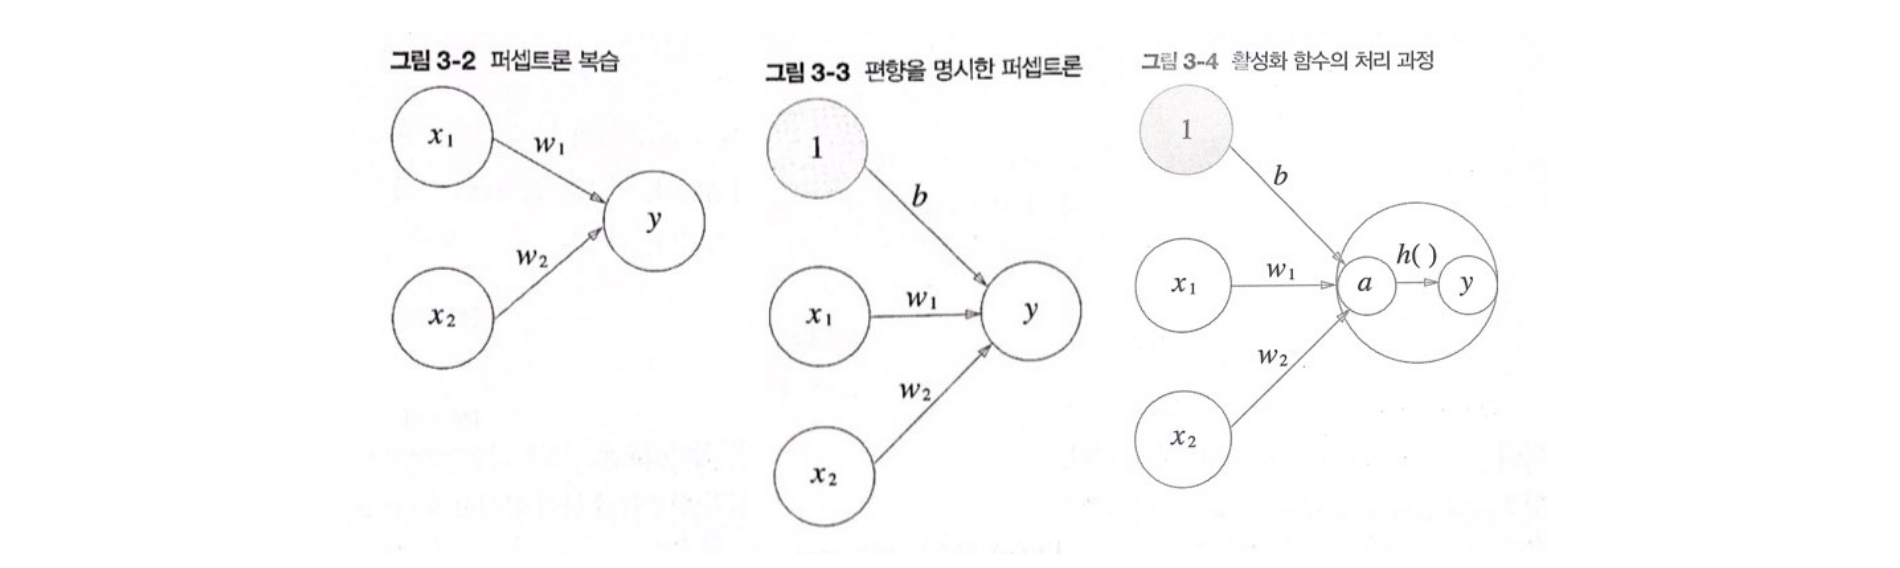

## 활성화 함수의 기초

In [2]:
# 아주 기본적인 활성화 함수는 계단 함수일 것이다.
# 들어온 값을 봐서 0보다 크면 1로 만들어서 전달한다.

import numpy as np
import matplotlib.pylab as plt

# 계단 함수
def step_function__(x):
    if x > 0:
        return  1
    else:
        return 0

# x 에 np.array 를 받을 수 있는 버전
def step_function_(x):
    y = x > 0
    return y.astype(int)

# 더 짧게 만들면.
def step_function(x):
    return np.array(x > 0, dtype=int)

print(step_function(np.array([-1,0,1,2])))

[0 0 1 1]


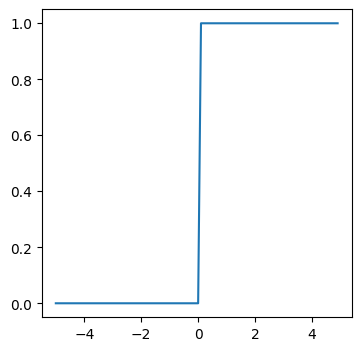

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.show()

## 활성화 함수에는 시그모이드(sigmoid)가 자주 쓰인다.

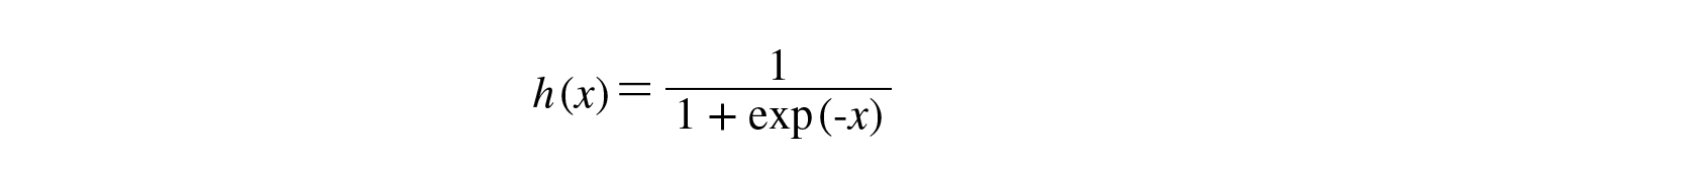

In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

sigmoid(np.array([-3,-2,-1,0,1,2,3]))   # 어떤 값을 주어도 0에서 1 사이의 값이 나온다.

array([0.04742587, 0.11920292, 0.26894142, 0.5       , 0.73105858,
       0.88079708, 0.95257413])

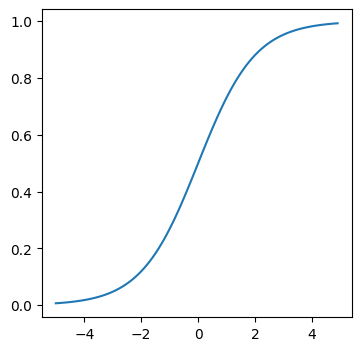

In [6]:
# 모양을 보자.
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.show()

`계단함수` 와 `시그모이드` 는 모두 비선형함수이다. 출력이 입력의 상수배 만큼 변하면 **선형함수**이다. 즉, 직선 한개로 표현 가능하다. 그렇지 않으면 **비선형함수** 이다.

활성화 함수에는 비선형 함수를 써야하는데, 안그러면 아무리 은닉층을 써도 **그저 '곱하기 얼마' 하는 것과 같아지기 때문**이다.

## 행렬 곱 (내적)

(신경망을 만들려면 다차원 행렬 계산이 필요하다. 사칙연산은 앞에서 공부했고, 여기서는 행렬의 내적 계산법을 보자)

앞쪽 행렬의 `열`과 뒤쪽 행렬의 `행` 의 수가 같아야 한다.

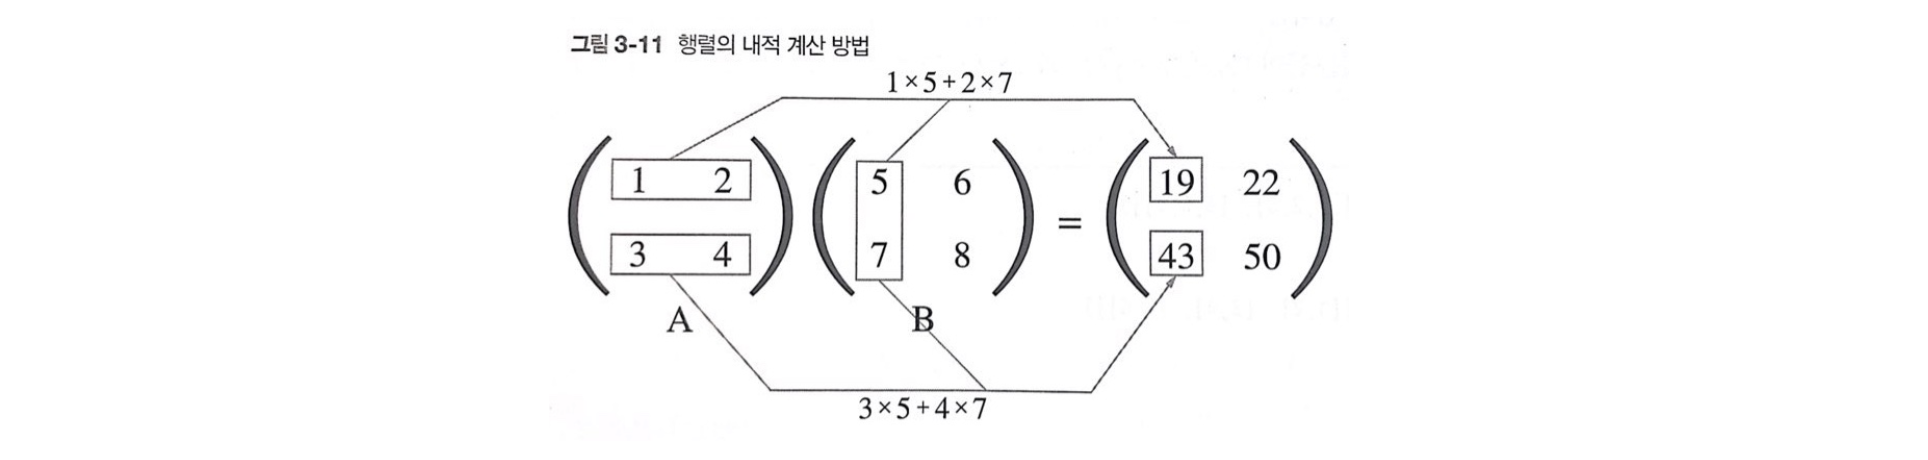

여기는 선형대수 공부하고 오면 좋다. 

MIT 강의가 좋았다. https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/download/

In [5]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A,B))

[[19 22]
 [43 50]]


In [6]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])
print(np.dot(A,B))

[23 53 83]


In [7]:
A = np.array([[1,2,0], [3,4,0], [5,6,0]])
B = np.array([7,8])
# print(np.dot(A,B)) # `열, 행` 의 갯수가 안맞아서 실패

## 신경망에서 내적

행렬의 내적 계산법이 여기에서 사용된다.

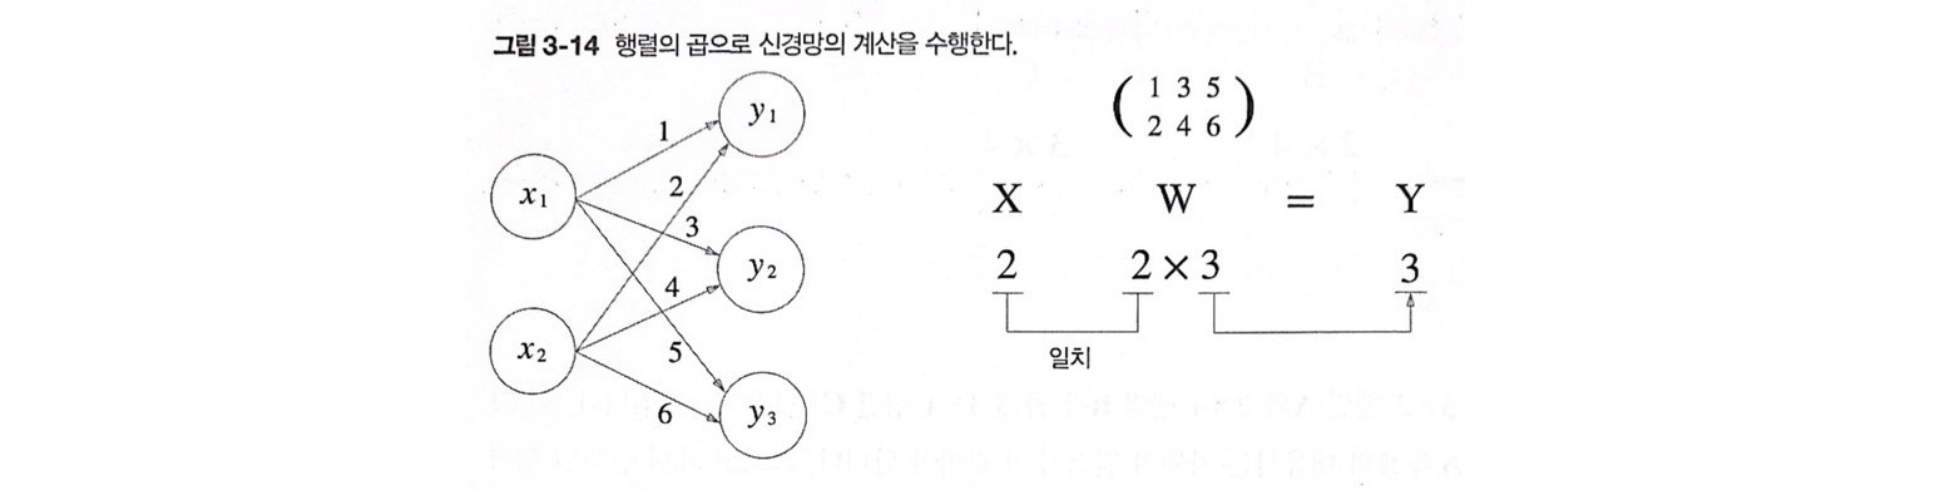

위의 설명을 보고 흥분해서 빨간색으로 필기했다.

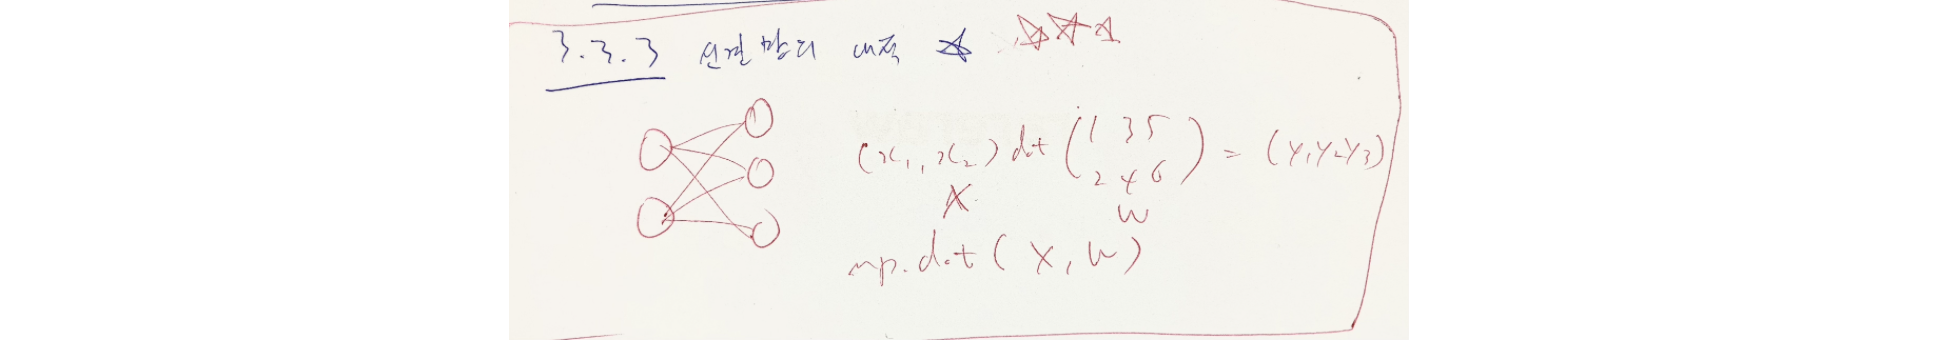


다음 그림은 신경망(뉴럴넷)을 타고 입력값들이 전파되는 과정을 그림으로 표현한 것이다.

- 입력값($x$), 가중치($w$)
- 입력값들과 가중치들과 편향(b: bias)
- 활성화함수
- 그 다음층
- 마지막은 identity function

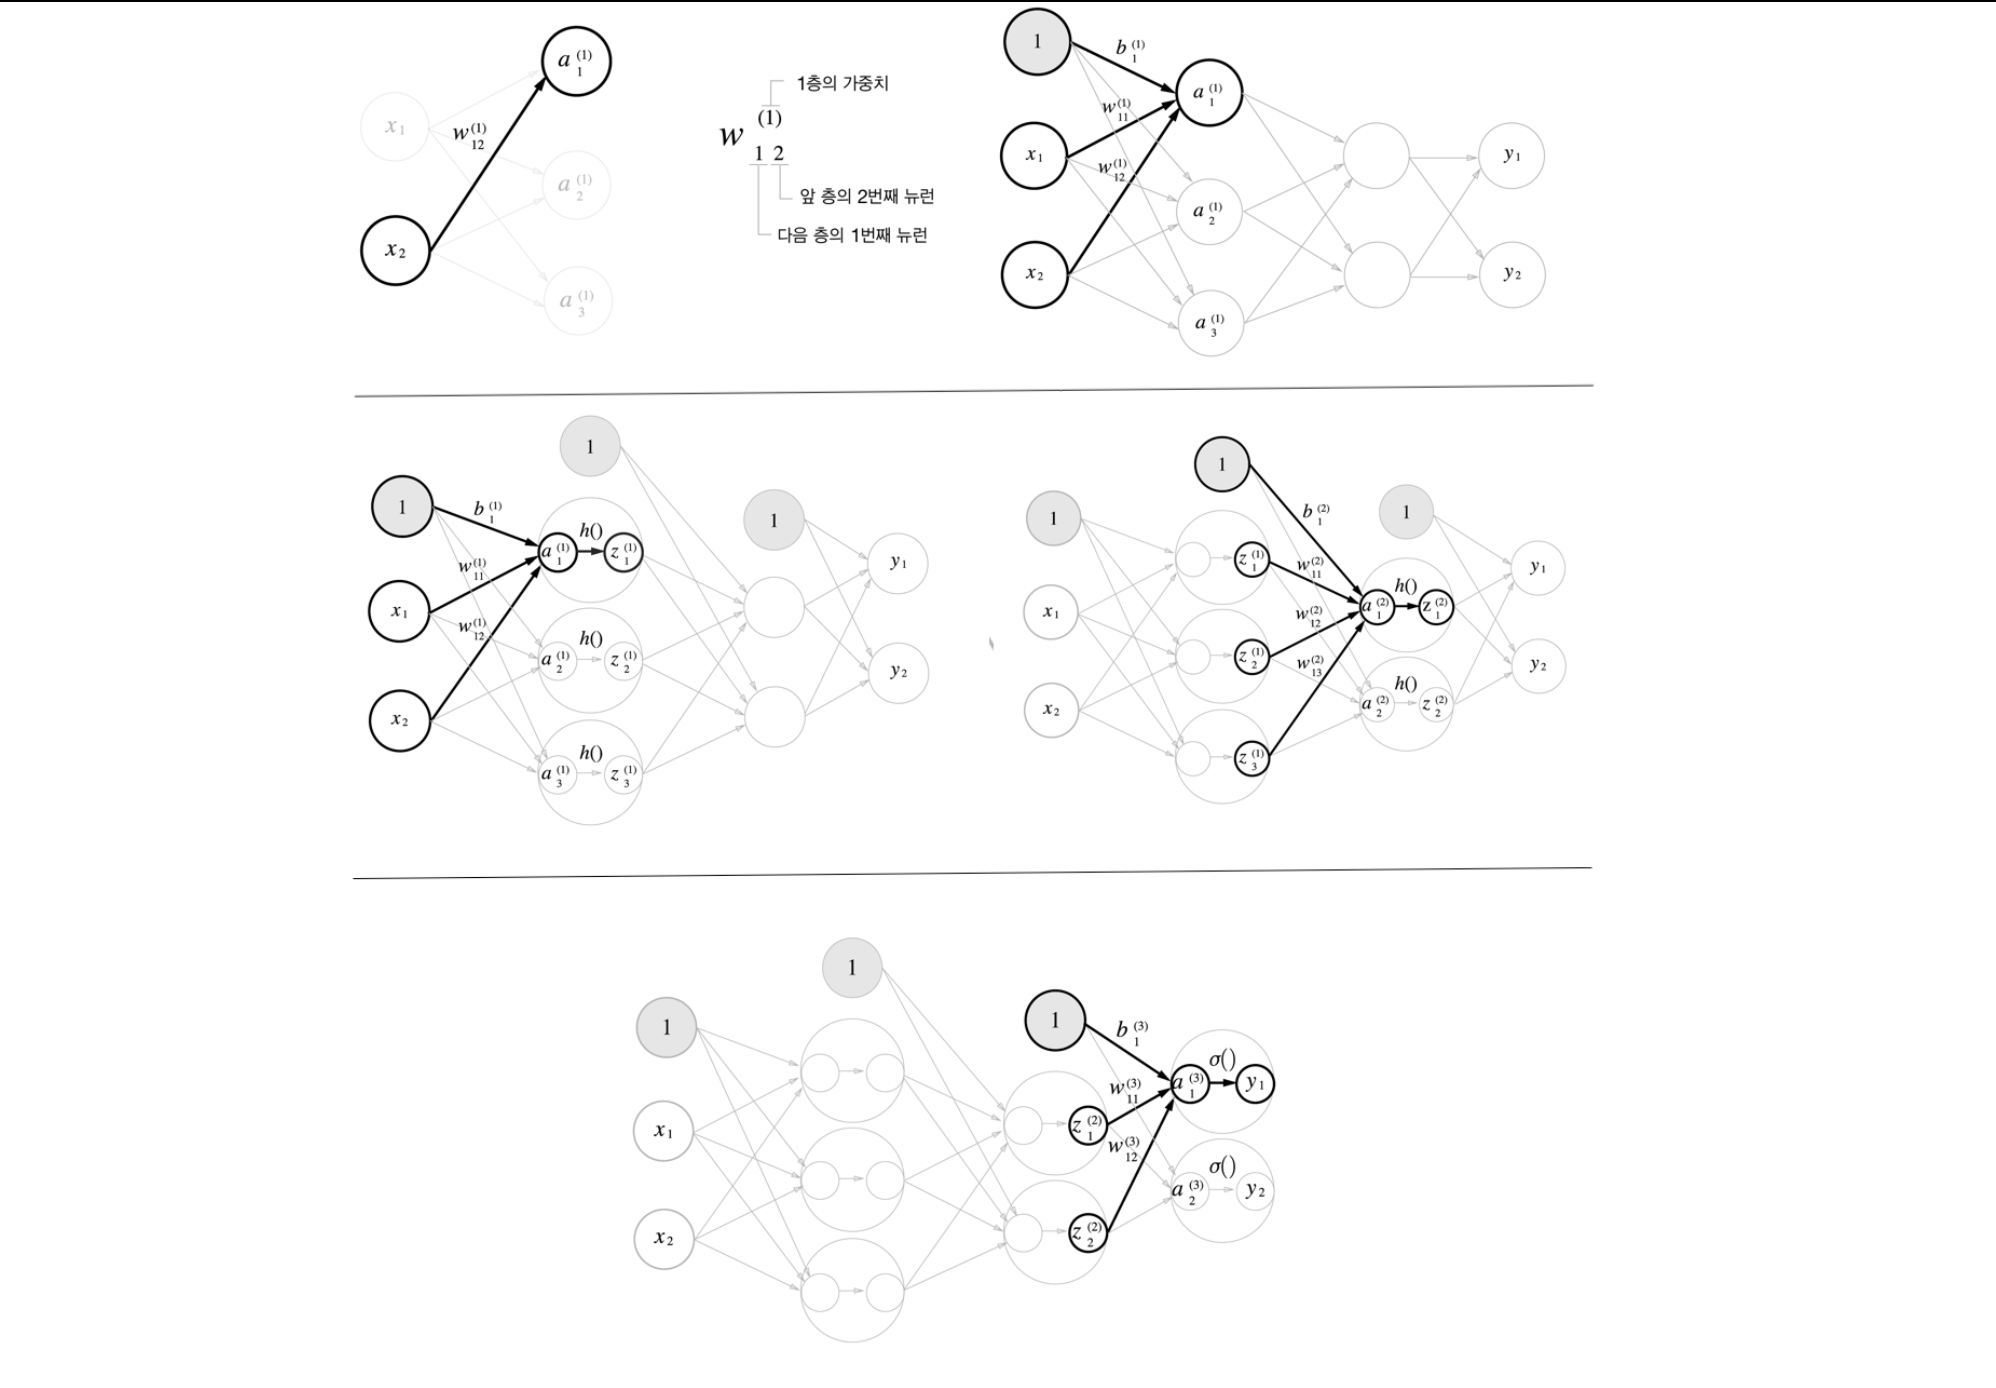

In [9]:
# 3층 신경망의 구현이다.

def init_net():
    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['b1'] = np.array(
        [0.1, 0.2, 0.3]
    )
    network['W2'] = np.array([
        [0.1, 0.3],
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b2'] = np.array(
        [0.1, 0.2]
    )
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b3'] = np.array(
        [0.1, 0.2]
    )
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    #y = identity_function(a3)  
    y = a3
    return y

network = init_net()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.30031959 0.65988931]
